In [1]:
import pandas as pd
import cv2
import easyocr
import numpy as np

In [2]:
from paddlex import create_model
model = create_model(model_name="RT-DETR-L_wired_table_cell_det")
output = model.predict("test.jpg",  threshold=0.3, batch_size=1)

Using official model (RT-DETR-L_wired_table_cell_det), the model files will be automatically downloaded and saved in /home/glenn/.paddlex/official_models.
/home/glenn/theia/notebooks/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


In [3]:
data = [x.json.items() for x in output]

In [4]:
cells = dict(data[0])['res']['boxes']

In [5]:
df = pd.DataFrame(cells)

In [6]:
df['box'] = df['coordinate']

In [7]:
df

,cls_id,label,score,coordinate,box
0,0,cell,0.973163,"[247.2122802734375, 1417.2315673828125, 1199.5...","[247.2122802734375, 1417.2315673828125, 1199.5..."
1,0,cell,0.972114,"[1195.8402099609375, 1393.009033203125, 2865.1...","[1195.8402099609375, 1393.009033203125, 2865.1..."
2,0,cell,0.958662,"[294.9110107421875, 844.703857421875, 1209.284...","[294.9110107421875, 844.703857421875, 1209.284..."
3,0,cell,0.958105,"[1689.8529052734375, 826.0762329101562, 2391.7...","[1689.8529052734375, 826.0762329101562, 2391.7..."
4,0,cell,0.957673,"[1205.7677001953125, 833.732421875, 1693.66113...","[1205.7677001953125, 833.732421875, 1693.66113..."
...,...,...,...,...,...
125,0,cell,0.737856,"[318.7481384277344, 470.7357177734375, 2787.10...","[318.7481384277344, 470.7357177734375, 2787.10..."
126,0,cell,0.544830,"[1205.08251953125, 966.8009033203125, 2818.768...","[1205.08251953125, 966.8009033203125, 2818.768..."
127,0,cell,0.506972,"[211.14906311035156, 0, 2975.682861328125, 440...","[211.14906311035156, 0, 2975.682861328125, 440..."
128,0,cell,0.502850,"[1914.0091552734375, 965.7259521484375, 2817.9...","[1914.0091552734375, 965.7259521484375, 2817.9..."


In [8]:
cv_img = cv2.imread('test.jpg')

In [9]:
"""
Procecure
loop through all boxes until MEASUREMENT cell is found
assign each MEASUREMENT to a unique id (there should be 3 max as there are 3 columns of measurement)
take the x1 and x2 (begin, end) coordinates of the cell
now loop through each row within the bounds of x1 and x2
"""

'\nProcecure\nloop through all boxes until MEASUREMENT cell is found\nassign each MEASUREMENT to a unique id (there should be 3 max as there are 3 columns of measurement)\ntake the x1 and x2 (begin, end) coordinates of the cell\nnow loop through each row within the bounds of x1 and x2\n'

In [10]:
import PIL
from PIL import Image

In [11]:
def to_img(s, img):
    s = [int(x) for x in s]
    # [xmin, ymin, xmax, ymax]
    x1, x2, y1, y2 = s[0], s[2], s[1], s[3]
    return cv_img[y1:y2, x1:x2]

In [12]:
df['box'] = df['box'].apply(lambda s: to_img(s, cv_img))

In [13]:
df

,cls_id,label,score,coordinate,box
0,0,cell,0.973163,"[247.2122802734375, 1417.2315673828125, 1199.5...","[[[197, 202, 205], [198, 203, 206], [199, 204,..."
1,0,cell,0.972114,"[1195.8402099609375, 1393.009033203125, 2865.1...","[[[166, 173, 176], [102, 109, 112], [51, 58, 6..."
2,0,cell,0.958662,"[294.9110107421875, 844.703857421875, 1209.284...","[[[188, 190, 191], [184, 186, 187], [184, 186,..."
3,0,cell,0.958105,"[1689.8529052734375, 826.0762329101562, 2391.7...","[[[202, 204, 205], [203, 205, 206], [197, 199,..."
4,0,cell,0.957673,"[1205.7677001953125, 833.732421875, 1693.66113...","[[[205, 205, 205], [176, 176, 176], [106, 106,..."
...,...,...,...,...,...
125,0,cell,0.737856,"[318.7481384277344, 470.7357177734375, 2787.10...","[[[156, 151, 152], [160, 155, 156], [158, 153,..."
126,0,cell,0.544830,"[1205.08251953125, 966.8009033203125, 2818.768...","[[[84, 85, 89], [33, 34, 38], [37, 38, 42], [2..."
127,0,cell,0.506972,"[211.14906311035156, 0, 2975.682861328125, 440...","[[[48, 39, 29], [48, 39, 29], [48, 39, 29], [4..."
128,0,cell,0.502850,"[1914.0091552734375, 965.7259521484375, 2817.9...","[[[200, 204, 209], [197, 201, 206], [197, 201,..."


In [14]:
reader = easyocr.Reader(['en'])

[2025-03-07 22:25:25,438] [ WARNING] easyocr.py:80 - Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [15]:
def to_text(s, reader):
    # remove allowlist if not only looking for numeric characters allowlist='0123456789'
    result = reader.readtext(s)
    if(len(result) == 0):
        return ""
    return result[0][1].replace(" ", "")

In [16]:
df['box'] = df['box'].apply(lambda s: to_text(s, reader))

In [17]:
df

,cls_id,label,score,coordinate,box
0,0,cell,0.973163,"[247.2122802734375, 1417.2315673828125, 1199.5...",NotesorotherobservationsEx:Its
1,0,cell,0.972114,"[1195.8402099609375, 1393.009033203125, 2865.1...","SeaWeed,n"
2,0,cell,0.958662,"[294.9110107421875, 844.703857421875, 1209.284...",NumberofStudentsMonitoring:
3,0,cell,0.958105,"[1689.8529052734375, 826.0762329101562, 2391.7...",NumberofAdultsMonitoring:
4,0,cell,0.957673,"[1205.7677001953125, 833.732421875, 1693.66113...",
...,...,...,...,...,...
125,0,cell,0.737856,"[318.7481384277344, 470.7357177734375, 2787.10...",
126,0,cell,0.544830,"[1205.08251953125, 966.8009033203125, 2818.768...",Chas*
127,0,cell,0.506972,"[211.14906311035156, 0, 2975.682861328125, 440...",BILION
128,0,cell,0.502850,"[1914.0091552734375, 965.7259521484375, 2817.9...",Ic


In [18]:
df.to_csv('out.csv')

In [34]:
df['box'] = df['box'].apply(lambda s: s == "MEASUREMENT(mm)")

In [36]:
df.to_csv('cols.csv')

In [37]:
df = df[df['box'] != False]

In [38]:
df

,cls_id,label,score,coordinate,box,is_measurement_column
26,0,cell,0.948612,"[2131.35888671875, 2439.5625, 2677.96069335937...",True,MEASUREMENT(mm)
31,0,cell,0.947454,"[306.4031677246094, 2443.879638671875, 837.443...",True,MEASUREMENT(mm)
32,0,cell,0.947321,"[1199.635498046875, 2440.307861328125, 1748.03...",True,MEASUREMENT(mm)


In [39]:
"""
Now with these "columns" take the xmin and xmax and ymax and crop out a "column" like image given the coordinates
to further go about extraction
"""

'\nNow with these "columns" take the xmin and xmax and ymax and crop out a "column" like image given the coordinates\nto further go about extraction\n'

In [84]:
s = list(df.iloc[0]['coordinate'])
s_bounds = [int(x) for x in s]
# [xmin, ymin, xmax, ymax]
x1, x2, y1, y2 = s_bounds[0], s_bounds[2], s_bounds[1], s_bounds[3]

height = cv_img.shape[0]
width = cv_img.shape[1]

# [y1:y2, x1:x2]
measure_col = cv_img[y1:height, x1:x2+90]

measure_img = Image.fromarray(measure_col)

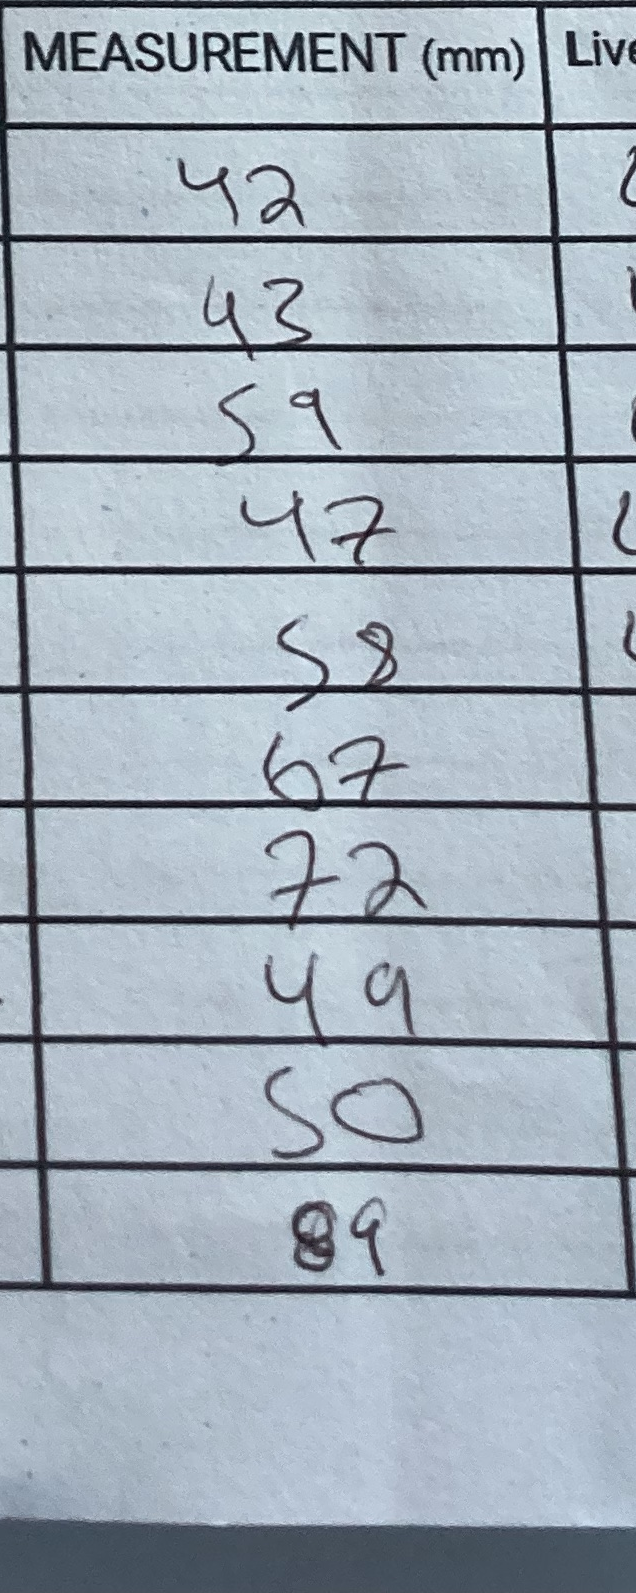

In [85]:
measure_img

In [73]:
df

,cls_id,label,score,coordinate,box,is_measurement_column
26,0,cell,0.948612,"[2131.35888671875, 2439.5625, 2677.96069335937...",True,MEASUREMENT(mm)
31,0,cell,0.947454,"[306.4031677246094, 2443.879638671875, 837.443...",True,MEASUREMENT(mm)
32,0,cell,0.947321,"[1199.635498046875, 2440.307861328125, 1748.03...",True,MEASUREMENT(mm)
